In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('supply_chain.csv')

In [3]:
data.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [4]:
data.shape

(32065, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [6]:
data.columns

Index(['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude',
       'fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'risk_classification', 'delivery_time_deviation'],
      dtype='object')

In [7]:
data.describe()

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,delivery_time_deviation
count,32065.000000,32065.000000,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,3.206500e+04,32065.000000,3.206500e+04,...,32065.000000,32065.000000,3.206500e+04,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,32065.000000,32065.000000
mean,38.023589,-90.116648,8.011735,2.893068,4.991493e+00,2.992547e+02,2.291669,3.026954e-01,0.600740,4.976082e-01,...,6022.001286,0.044792,2.972816e-01,7.001144,2.296448,4.983913e-01,6.008723e-01,0.803656,0.699077,5.177648
std,6.917909,17.369244,4.264960,2.274044,3.532048e+00,3.234435e+02,1.554202,3.259146e-01,0.345672,3.532853e-01,...,3427.638017,14.187486,3.216115e-01,3.236328,1.555932,3.541589e-01,3.458101e-01,0.279185,0.324514,4.157988
min,30.000000,-119.999998,5.000000,-1.999993,1.091633e-09,1.322210e-12,0.500000,4.565769e-16,0.000001,4.536949e-09,...,100.002966,-10.000000,7.255415e-19,0.000050,0.500000,4.043927e-09,3.269508e-07,0.000048,0.000003,-1.999998
25%,31.280550,-106.253913,5.019984,1.185744,1.474720e+00,1.605163e+01,0.774798,1.710828e-02,0.277096,1.440135e-01,...,2822.607616,-9.931074,1.678269e-02,4.593407,0.776166,1.443567e-01,2.783148e-01,0.693739,0.456009,1.269197
50%,36.413820,-86.293414,5.636036,3.882059,4.981244e+00,1.572880e+02,1.917121,1.595151e-01,0.680553,4.961781e-01,...,6785.123209,-7.858681,1.549760e-01,8.385605,1.938273,4.988468e-01,6.831130e-01,0.958128,0.839599,6.113662
75%,44.453655,-73.079367,9.669944,4.884355,8.534902e+00,5.405980e+02,3.734188,5.535954e-01,0.938160,8.498226e-01,...,9374.252913,6.024012,5.405408e-01,9.836152,3.750817,8.510762e-01,9.372889e-01,0.998746,0.982391,9.249206
max,50.000000,-70.000000,19.999875,5.000000,9.999999e+00,9.999993e+02,5.000000,9.999995e-01,1.000000,1.000000e+00,...,10000.000000,39.999886,1.000000e+00,10.000000,5.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,10.000000


In [8]:
data.describe(include=object)

,timestamp,risk_classification
count,32065,32065
unique,32065,3
top,2021-01-01 00:00:00,High Risk
freq,1,23944


In [9]:
data.isnull().sum()

timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date'] = data['timestamp'].dt.date
data['time'] = data['timestamp'].dt.time

data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop(columns=['timestamp'], axis=1)
data.head()

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation,date,time,year,month,day
0,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,...,0.978599,0.506152,0.885291,Moderate Risk,9.110682,2021-01-01,00:00:00,2021,1,1
1,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,...,0.918586,0.980784,0.544178,High Risk,8.175281,2021-01-01,01:00:00,2021,1,1
2,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,...,0.394215,0.998633,0.803322,High Risk,1.283594,2021-01-01,02:00:00,2021,1,1
3,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,...,0.905444,0.993320,0.025977,High Risk,9.304897,2021-01-01,03:00:00,2021,1,1
4,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,...,0.258702,0.912433,0.991122,High Risk,7.752484,2021-01-01,04:00:00,2021,1,1


In [12]:
data.columns

Index(['vehicle_gps_latitude', 'vehicle_gps_longitude',
       'fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'risk_classification', 'delivery_time_deviation', 'date', 'time',
       'year', 'month', 'day'],
      dtype='object')

### Anomaly Detection

In [13]:
# Autoencoder Model for Anomaly Detection(Unsupervised)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
import joblib

In [15]:
features = ['eta_variation_hours', 'fuel_consumption_rate',
            'traffic_congestion_level', 'supplier_reliability_score',
            'route_risk_level', 'customs_clearance_time']

data = data.dropna(subset=features)
X = data[features]

In [16]:
X

,eta_variation_hours,fuel_consumption_rate,traffic_congestion_level,supplier_reliability_score,route_risk_level,customs_clearance_time
0,4.998009,5.136512,5.927586,0.986064,1.182116,0.502006
1,0.984929,5.101512,1.591992,0.463233,9.611988,0.966774
2,4.972665,5.090803,8.787765,0.598561,6.570431,0.945627
3,3.095064,8.219558,0.045257,0.742735,0.548952,4.674035
4,3.216077,5.000075,8.004851,0.431088,8.861443,3.445429
...,...,...,...,...,...,...
32060,4.394370,5.421806,0.192421,0.316930,9.893402,0.966050
32061,2.700635,10.624778,8.736143,0.221629,0.854378,1.665889
32062,0.485288,5.071596,7.420200,0.348949,4.480552,0.690990
32063,4.759411,5.000000,0.932050,0.185130,9.185549,4.462204


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train,X_test = train_test_split(X_scaled,test_size=0.2,random_state=42)

In [19]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (25652, 6)
Test set shape: (6413, 6)


In [20]:
input_dim = X_train.shape[1]
encoding_dim = 3  #bottleneck layer size

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Print model summary
print("\nAutoencoder Model Summary:")
autoencoder.summary()


Autoencoder Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.8604 - val_loss: 0.5542
Epoch 2/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5046 - val_loss: 0.4655
Epoch 3/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4490 - val_loss: 0.4401
Epoch 4/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4254 - val_loss: 0.4197
Epoch 5/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4026 - val_loss: 0.4036
Epoch 6/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3915 - val_loss: 0.3889
Epoch 7/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3834 - val_loss: 0.3829
Epoch 8/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3759 - val_loss: 0.3760
Epoch 9/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3703 - val_loss: 0.3713
Epoch 10/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3688 - val_loss: 0.3670
Epoch 11/100
642/642 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3641 - val_loss: 0.3631
Epoch 12/100
642/642 ━━━━━━━━━━━━━━━━━━━━

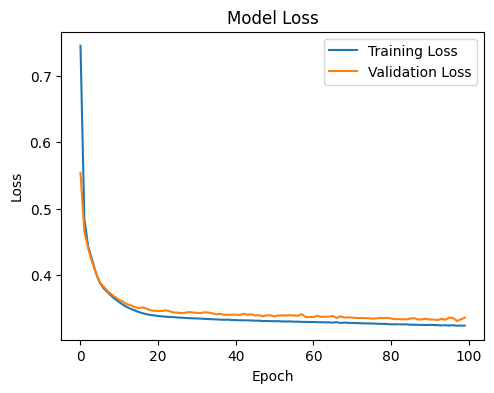

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [23]:
autoencoder.save('models/supply_chain_autoencoder.h5')
joblib.dump(scaler, 'models/supply_chain_scaler.pkl')

['models/supply_chain_scaler.pkl']

### Risk Classification

In [26]:
features = ['eta_variation_hours', 'fuel_consumption_rate',
            'traffic_congestion_level', 'supplier_reliability_score',
            'route_risk_level', 'customs_clearance_time']
target = 'risk_classification'

data = data.dropna(subset=features + [target])
X = data[features]
y = data[target]

In [27]:
X

,eta_variation_hours,fuel_consumption_rate,traffic_congestion_level,supplier_reliability_score,route_risk_level,customs_clearance_time
0,4.998009,5.136512,5.927586,0.986064,1.182116,0.502006
1,0.984929,5.101512,1.591992,0.463233,9.611988,0.966774
2,4.972665,5.090803,8.787765,0.598561,6.570431,0.945627
3,3.095064,8.219558,0.045257,0.742735,0.548952,4.674035
4,3.216077,5.000075,8.004851,0.431088,8.861443,3.445429
...,...,...,...,...,...,...
32060,4.394370,5.421806,0.192421,0.316930,9.893402,0.966050
32061,2.700635,10.624778,8.736143,0.221629,0.854378,1.665889
32062,0.485288,5.071596,7.420200,0.348949,4.480552,0.690990
32063,4.759411,5.000000,0.932050,0.185130,9.185549,4.462204


In [28]:
y

0        Moderate Risk
1            High Risk
2            High Risk
3            High Risk
4            High Risk
             ...      
32060        High Risk
32061        High Risk
32062    Moderate Risk
32063        High Risk
32064        High Risk
Name: risk_classification, Length: 32065, dtype: object

In [29]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_scaled,y_train)

C:\Users\Abhay Tiwari\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [23:01:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
print(classification_report(y_test, xgb.predict(X_test_scaled), target_names=le.classes_))

               precision    recall  f1-score   support

    High Risk       0.74      0.99      0.85      4764
     Low Risk       0.00      0.00      0.00       641
Moderate Risk       0.12      0.00      0.01      1008

     accuracy                           0.74      6413
    macro avg       0.29      0.33      0.29      6413
 weighted avg       0.57      0.74      0.63      6413



In [35]:
joblib.dump(xgb, "models/risk_classifier_xgb.pkl")
joblib.dump(scaler, "models/risk_scaler.save")
joblib.dump(le, "models/risk_label_encoder.save")

['models/risk_label_encoder.save']

### Predictive Maintenance

In [18]:
# Calculating mileage of a vehicle on a particular day for predictive maintenance
import pandas as pd
import numpy as np
from math import radians, cos, sin, sqrt, atan2


# Drop missing GPS or time data
data.dropna(subset=['vehicle_gps_latitude', 'vehicle_gps_longitude', 'date', 'time'], inplace=True)

# Combine date and time
data['timestamp'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['time'].astype(str))

# Sort by timestamp to get proper sequence
data = data.sort_values('timestamp').reset_index(drop=True)

# Shift GPS to calculate distance between consecutive rows
data['lat_prev'] = data['vehicle_gps_latitude'].shift(1)
data['lon_prev'] = data['vehicle_gps_longitude'].shift(1)

# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c  # in kilometers

# Compute distance between consecutive GPS points
data['trip_distance_km'] = data.apply(
    lambda row: haversine(row['lat_prev'], row['lon_prev'],
                          row['vehicle_gps_latitude'], row['vehicle_gps_longitude'])
    if not pd.isnull(row['lat_prev']) else 0,
    axis=1
)

# Optional: convert to miles
data['trip_distance_miles'] = data['trip_distance_km'] * 0.621371

# Compute cumulative mileage
data['estimated_mileage'] = data['trip_distance_miles'].cumsum()

# Drop helper columns
data.drop(columns=['lat_prev', 'lon_prev'], inplace=True)

# Preview
print(data[['timestamp', 'trip_distance_miles', 'estimated_mileage']].head(10))


            timestamp  trip_distance_miles  estimated_mileage
0 2021-01-01 00:00:00             0.000000           0.000000
1 2021-01-01 01:00:00          2240.652303        2240.652303
2 2021-01-01 02:00:00          2449.057102        4689.709405
3 2021-01-01 03:00:00           543.568677        5233.278082
4 2021-01-01 04:00:00           459.443428        5692.721509
5 2021-01-01 05:00:00          2894.725919        8587.447428
6 2021-01-01 06:00:00          1575.804953       10163.252381
7 2021-01-01 07:00:00           378.381499       10541.633880
8 2021-01-01 08:00:00           806.227293       11347.861173
9 2021-01-01 09:00:00          1244.260979       12592.122152


In [19]:
data

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,delivery_time_deviation,date,time,year,month,day,timestamp,trip_distance_km,trip_distance_miles,estimated_mileage
0,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,...,9.110682,2021-01-01,00:00:00,2021,1,1,2021-01-01 00:00:00,0.000000,0.000000,0.000000e+00
1,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,...,8.175281,2021-01-01,01:00:00,2021,1,1,2021-01-01 01:00:00,3605.981456,2240.652303,2.240652e+03
2,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,...,1.283594,2021-01-01,02:00:00,2021,1,1,2021-01-01 02:00:00,3941.376571,2449.057102,4.689709e+03
3,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,...,9.304897,2021-01-01,03:00:00,2021,1,1,2021-01-01 03:00:00,874.789260,543.568677,5.233278e+03
4,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,...,7.752484,2021-01-01,04:00:00,2021,1,1,2021-01-01 04:00:00,739.402752,459.443428,5.692722e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32060,48.496665,-104.031158,5.421806,4.394370,0.192421,127.684977,3.607803,0.208643,0.992997,0.792648,...,5.506049,2024-08-28,20:00:00,2024,8,28,2024-08-28 20:00:00,2562.409481,1592.206942,4.169847e+07
32061,34.670137,-89.893091,10.624778,2.700635,8.736143,84.638889,1.218165,0.472389,0.946031,0.034156,...,-1.876938,2024-08-28,21:00:00,2024,8,28,2024-08-28 21:00:00,1928.918223,1198.573845,4.169967e+07
32062,42.963338,-82.149873,5.071596,0.485288,7.420200,48.500920,4.999149,0.064366,0.437687,0.022338,...,9.790219,2024-08-28,22:00:00,2024,8,28,2024-08-28 22:00:00,1139.231489,707.885410,4.170038e+07
32063,32.082410,-70.070154,5.000000,4.759411,0.932050,972.437425,0.505242,0.250949,0.517051,0.782338,...,9.956879,2024-08-28,23:00:00,2024,8,28,2024-08-28 23:00:00,1608.638634,999.561397,4.170138e+07


In [20]:
# Predictive maintenance
features_pm = [
    'fuel_consumption_rate',
    'iot_temperature',
    'driver_behavior_score',
    'fatigue_monitoring_score',
    'cargo_condition_status',
    'estimated_mileage', 
    'loading_unloading_time',
    'traffic_congestion_level',
    'weather_condition_severity',
    'port_congestion_level'
]

In [35]:
#Conditions to synthetic failure label generation
conditions = (
    (data['fuel_consumption_rate'] > 4) &  # High fuel usage
    (data['iot_temperature'] > -2) &        # High internal temp
    (data['fatigue_monitoring_score'] < 0.2) &  # Driver fatigue
    (data['driver_behavior_score'] < 0.3) &     # Poor driving
    (data['cargo_condition_status'] == 0) &     # Cargo damaged
    (data['estimated_mileage'] > data['estimated_mileage'].quantile(0.9))  # High mileage
)

data['failure_label'] = np.where(conditions,1,0)

#Add noise to failure label
np.random.seed(42)
data.loc[data.sample(frac=0.35).index, 'failure_label'] = 1  # Add 35% noise

data['failure_label'].value_counts()

failure_label
0    20842
1    11223
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [39]:
#Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features_pm])

#  Create sequences (LSTM needs 3D input)
def create_sequences(data, labels, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(labels[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_features, data['failure_label'].values, time_steps)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#  Train
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


C:\Users\Abhay Tiwari\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
722/722 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6516 - loss: 0.6478 - val_accuracy: 0.6686 - val_loss: 0.6360
Epoch 2/20
722/722 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6506 - loss: 0.6494 - val_accuracy: 0.6686 - val_loss: 0.6355
Epoch 3/20
722/722 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6552 - loss: 0.6446 - val_accuracy: 0.6686 - val_loss: 0.6376
Epoch 4/20
722/722 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6531 - loss: 0.6463 - val_accuracy: 0.6686 - val_loss: 0.6387
Epoch 5/20
722/722 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6520 - loss: 0.6469 - val_accuracy: 0.6686 - val_loss: 0.6352
Epoch 6/20
722/722 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6538 - loss: 0.6454 - val_accuracy: 0.6686 - val_loss: 0.6354
Epoch 7/20
722/722 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6532 - loss: 0.6465 - val_accuracy: 0.6686 - val_loss: 0.6351
Epoch 8/20
722/722 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6504 - loss: 0.6481 - val_accuracy: 

In [40]:
# Save model and scaler
model.save("models/lstm_maintenance_model.h5")
import joblib
joblib.dump(scaler, "models/lstm_maintenance_scaler.save")

['models/lstm_maintenance_scaler.save']